Прочитайте данные из файла.

Определите оптимальное количество кластеров для прочитанных данных.

Постройте оптимальное разбиение на кластеры.

Спрогнозируйте классы для векторов

[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
и
[0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

Постройте график метрики "силуэт" в зависимости от количества кластеров.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
#plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score

In [ ]:
x = pd.read_csv('X.csv', sep=' ', header=None)

In [ ]:
x

,0,1,2,3,4
0,0.149014,0.097225,-0.424611,0.075148,0.107336
1,-0.041479,-0.115525,-0.126194,0.103934,0.168235
2,0.194307,-0.203077,-0.102814,-0.204007,0.324915
3,0.456909,0.183503,-0.240683,0.069676,0.316141
4,-0.070246,0.309300,-0.048386,0.087922,-0.413301
...,...,...,...,...,...
295,4.970333,4.554531,5.055404,4.804593,5.601828
296,5.275723,4.233824,4.595862,4.841415,5.618451
297,4.912918,5.280296,4.708516,5.175909,5.362510
298,5.080218,4.589936,5.360124,5.371485,5.307219


In [ ]:
x.shape

(299, 5)

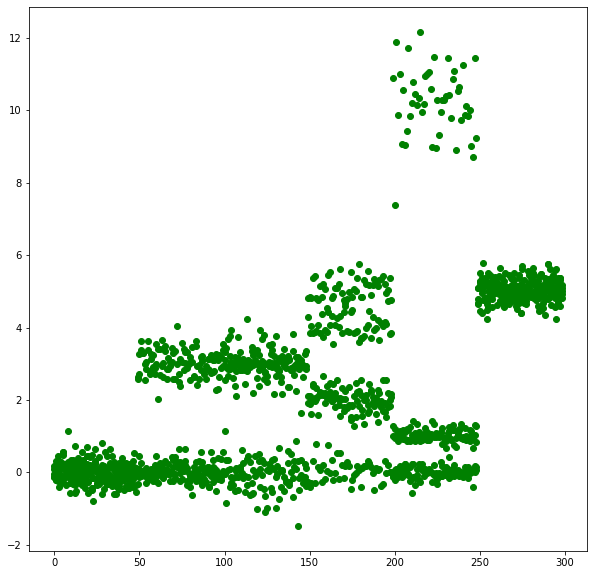

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(x, 'go');

In [ ]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler()
X_s = SC.fit_transform(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

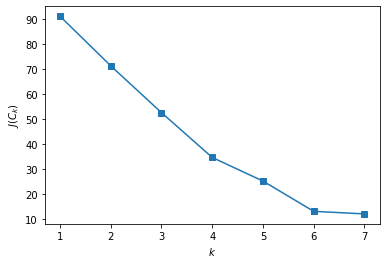

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [ ]:
b = {'1': [-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998], '2': [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]}
b = pd.DataFrame(np.array([[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998], [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]]))
b

,0,1,2,3,4
0,-0.180500,-0.065900,-0.465199,0.187700,-0.21911
1,0.222688,-0.133287,2.884500,3.277208,2.93884


In [ ]:
kmeans.predict(b)

array([3, 5], dtype=int32)

# Иерархическая кластеризация

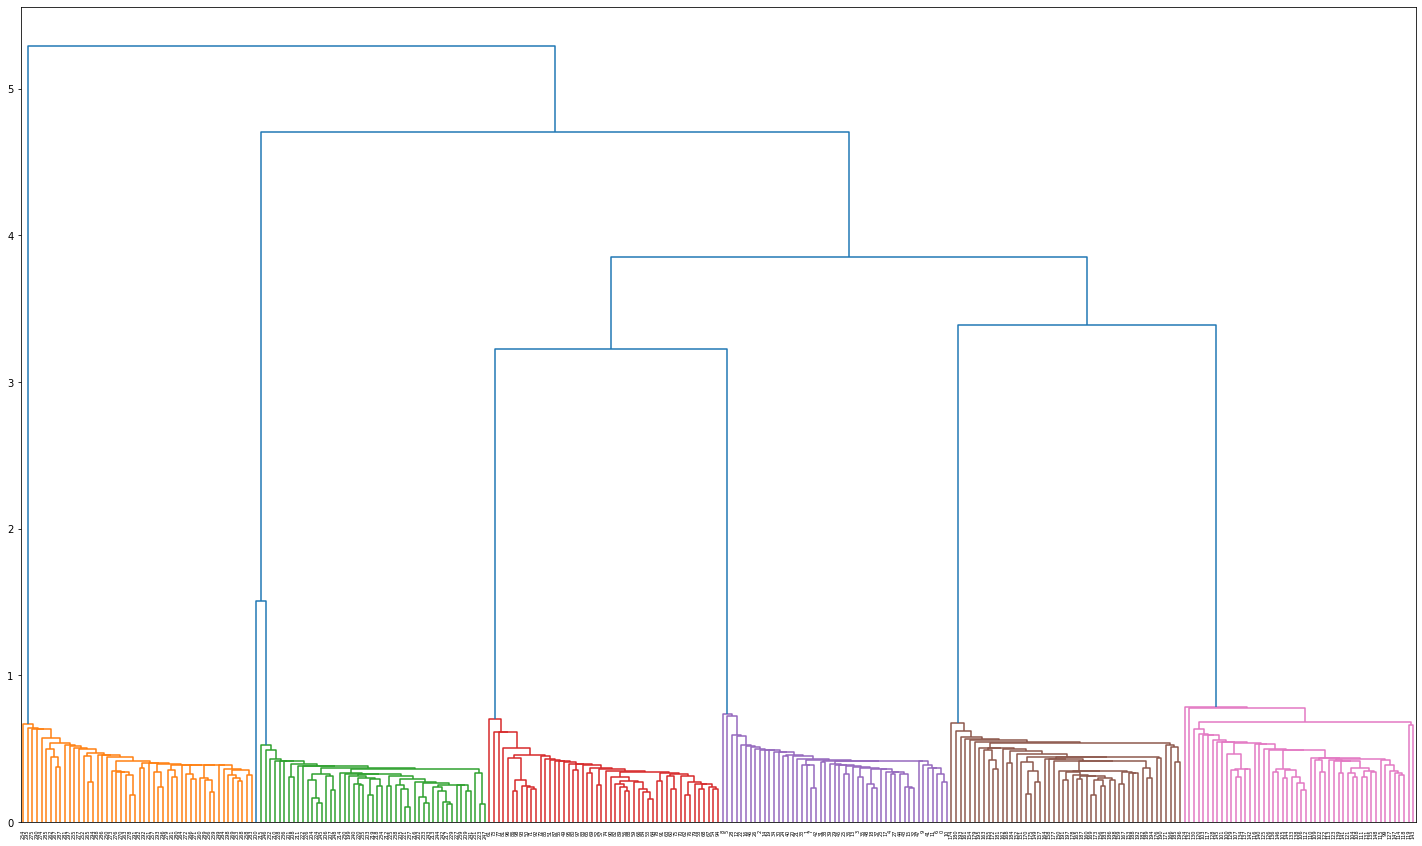

In [ ]:
# Построение дерева иерархий
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(x) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(25, 15))
dn = hierarchy.dendrogram(Z, color_threshold=0.9)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters = 6)

In [ ]:
agg.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
# Метрики
from sklearn import metrics
metrics.silhouette_score(x, agg.labels_)

0.812219802191881

In [ ]:
X = np.zeros((6, 2))

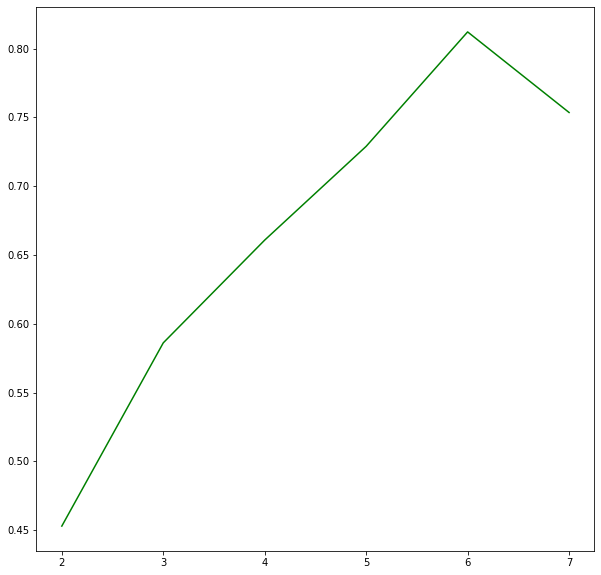

In [ ]:
for i in range(2, 8):
  
  agg = AgglomerativeClustering(n_clusters = i)
  agg.fit_predict(x)
  X[i-2, 1] = metrics.silhouette_score(x, agg.labels_)
plt.figure(figsize=(10, 10))
X[:,0] = range(2, 8)
plt.plot(X[:, 0], X[:, 1], 'g');

In [ ]:
X

array([[2.        , 0.4529095 ],
       [3.        , 0.58613967],
       [4.        , 0.6608668 ],
       [5.        , 0.7290386 ],
       [6.        , 0.8122198 ],
       [7.        , 0.75362314]])